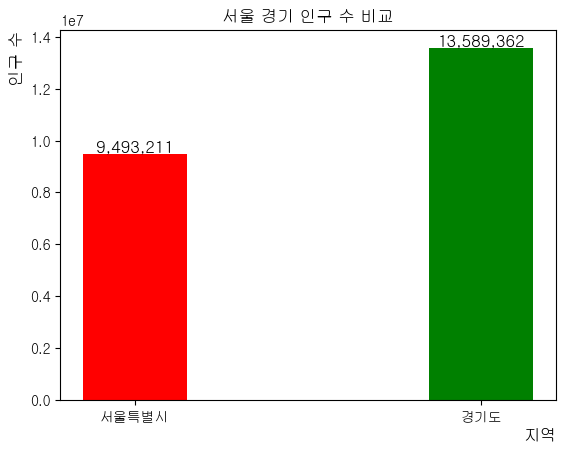

In [117]:
import pandas as pd 
import matplotlib.pyplot as plt 
from chart_studio import plotly
import cufflinks as cf
cf.go_offline(connected=True)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# #인구수
loc = ["서울특별시","경기도"]
gg = [9493211, 13589362]

index = ['인구 수']
pp = plt.bar(loc, gg,
        color=['red', 'green'],
        width=0.3)

# df.plot.bar(color = {"서울특별시":'#FF0000', "경기도":'green'})
# plt.gca().set_facecolor('#E6F0F8') #배경색
for rect in pp:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, format(int('%d' % height), ','), ha='center', va='bottom', size = 12)
plt.title("서울 경기 인구 수 비교")
plt.xlabel("지역", size =12, loc='right')
plt.ylabel("인구 수", size =12, loc='top')
plt.show()

#은행 수 / 지역별 인구 

